In [1]:
!pip3 install yfinance pandas numpy matplotlib statsmodels pandas_datareader fredapi


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.0 MB/s  0:00:00 eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15635 sha256=5a9856b896a5c64c9e786ffad4dde3b278f3f3f7ca35342e4f57767539bab25c
  Stored in directory: /Users/nitish/Library/Caches/pip/wheels/1e/df/0f/e2bbb22d689b30c681feb5410ab64a2523437b34c8ecfc6476
Successfully built multitasking
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [fredapi]m3/7 [curl_cffi]


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas_datareader import data as pdr


Matplotlib is building the font cache; this may take a moment.


In [3]:
start_date = "2005-01-01"
end_date = "2025-12-31"


In [4]:
banks = ["JPM", "BAC", "WFC", "C", "GS", "MS"]

bank_data = yf.download(banks, start=start_date, end=end_date)["Adj Close"]

bank_data.head()


[*********************100%***********************]  6 of 6 completed


KeyError: 'Adj Close'

In [5]:
banks = ["JPM", "BAC", "WFC", "C", "GS", "MS"]

bank_data = yf.download(banks, start=start_date, end=end_date)["Adj Close"]

bank_data.head()


[*********************100%***********************]  6 of 6 completed


KeyError: 'Adj Close'

In [6]:
banks = ["JPM", "BAC", "WFC", "C", "GS", "MS"]

# Download data
bank_data = yf.download(banks, start=start_date, end=end_date)

# Check column names
print(bank_data.columns)


[*********************100%***********************]  6 of 6 completed

MultiIndex([( 'Close', 'BAC'),
            ( 'Close',   'C'),
            ( 'Close',  'GS'),
            ( 'Close', 'JPM'),
            ( 'Close',  'MS'),
            ( 'Close', 'WFC'),
            (  'High', 'BAC'),
            (  'High',   'C'),
            (  'High',  'GS'),
            (  'High', 'JPM'),
            (  'High',  'MS'),
            (  'High', 'WFC'),
            (   'Low', 'BAC'),
            (   'Low',   'C'),
            (   'Low',  'GS'),
            (   'Low', 'JPM'),
            (   'Low',  'MS'),
            (   'Low', 'WFC'),
            (  'Open', 'BAC'),
            (  'Open',   'C'),
            (  'Open',  'GS'),
            (  'Open', 'JPM'),
            (  'Open',  'MS'),
            (  'Open', 'WFC'),
            ('Volume', 'BAC'),
            ('Volume',   'C'),
            ('Volume',  'GS'),
            ('Volume', 'JPM'),
            ('Volume',  'MS'),
            ('Volume', 'WFC')],
           names=['Price', 'Ticker'])


In [7]:
# Try Adj Close first
if 'Adj Close' in bank_data.columns.get_level_values(0):
    bank_data = bank_data['Adj Close']
else:
    bank_data = bank_data['Close']

bank_data.head()


Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2005-01-03,29.018412,297.748657,75.732071,22.268501,29.459198,17.256224
2005-01-04,28.618687,295.219543,75.241402,22.038984,29.143000,17.270161
2005-01-05,28.287634,298.920502,74.902237,22.084883,28.974350,17.289682
2005-01-06,28.243916,301.819855,75.934181,22.211121,29.659460,17.351002
2005-01-07,27.937868,300.092529,75.609421,22.033243,29.543514,17.328693


In [8]:
from pandas_datareader import data as pdr

# Download Federal Funds Rate
fed_rate = pdr.DataReader("DFF", "fred", start_date, end_date)

fed_rate.head()


,DFF
DATE,
2005-01-01,1.97
2005-01-02,1.97
2005-01-03,2.31
2005-01-04,2.25
2005-01-05,2.25


In [9]:
# Download S&P 500 data
sp500_data = yf.download("^GSPC", start=start_date, end=end_date)

# Extract Adjusted Close safely
if 'Adj Close' in sp500_data.columns:
    sp500_data = sp500_data['Adj Close']
else:
    sp500_data = sp500_data['Close']

sp500_data.head()


[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC
Date,
2005-01-03,1202.079956
2005-01-04,1188.050049
2005-01-05,1183.739990
2005-01-06,1187.890015
2005-01-07,1186.189941


In [10]:
# Calculate bank returns using log returns
bank_returns = np.log(bank_data / bank_data.shift(1))

bank_returns.head()



Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,-0.013871,-0.008530,-0.006500,-0.010360,-0.010791,0.000807
2005-01-05,-0.011635,0.012458,-0.004518,0.002080,-0.005804,0.001130
2005-01-06,-0.001547,0.009653,0.013683,0.005700,0.023370,0.003540
2005-01-07,-0.010895,-0.005739,-0.004286,-0.008041,-0.003917,-0.001287


In [11]:
# Calculate market returns
sp500_returns = np.log(sp500_data / sp500_data.shift(1))

sp500_returns.head()


Ticker,^GSPC
Date,
2005-01-03,NaN
2005-01-04,-0.011740
2005-01-05,-0.003634
2005-01-06,0.003500
2005-01-07,-0.001432


In [12]:
# Calculate Fed rate changes
fed_rate_change = fed_rate.diff()

fed_rate_change.head()


,DFF
DATE,
2005-01-01,NaN
2005-01-02,0.00
2005-01-03,0.34
2005-01-04,-0.06
2005-01-05,0.00


In [13]:
# Merge all datasets
data = pd.concat([bank_returns, sp500_returns, fed_rate_change], axis=1)

# Rename columns clearly
data.columns = ["JPM", "BAC", "WFC", "C", "GS", "MS", "SP500_Return", "FedRateChange"]

# Remove missing values
data = data.dropna()

# Show first rows
data.head()


,JPM,BAC,WFC,C,GS,MS,SP500_Return,FedRateChange
2005-01-04,-0.013871,-0.008530,-0.006500,-0.010360,-0.010791,0.000807,-0.011740,-0.06
2005-01-05,-0.011635,0.012458,-0.004518,0.002080,-0.005804,0.001130,-0.003634,0.00
2005-01-06,-0.001547,0.009653,0.013683,0.005700,0.023370,0.003540,0.003500,0.00
2005-01-07,-0.010895,-0.005739,-0.004286,-0.008041,-0.003917,-0.001287,-0.001432,-0.01
2005-01-10,0.012442,-0.006392,0.001907,-0.003392,-0.000179,-0.000643,0.003417,0.02


In [14]:
data.to_csv("bank_interest_rate_dataset.csv")


In [15]:
# Define dependent variable (JPM returns)
Y = data["JPM"]

# Define independent variables
X = data[["FedRateChange", "SP500_Return"]]

# Add constant (intercept)
X = sm.add_constant(X)

# Run regression
model = sm.OLS(Y, X).fit()

# Show results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     2336.
Date:                Tue, 17 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:15:32   Log-Likelihood:                 12935.
No. Observations:                5281   AIC:                        -2.586e+04
Df Residuals:                    5278   BIC:                        -2.584e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0004      0.000     -1.406

In [16]:
# Save summary to text file
with open("JPM_regression_results.txt", "w") as f:
    f.write(model.summary().as_text())


In [17]:
banks = ["JPM", "BAC", "WFC", "C", "GS", "MS"]

for bank in banks:
    print("\n")
    print("Regression results for:", bank)
    
    Y = data[bank]
    X = data[["FedRateChange", "SP500_Return"]]
    X = sm.add_constant(X)
    
    model = sm.OLS(Y, X).fit()
    
    print(model.summary())




Regression results for: JPM
                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     2336.
Date:                Tue, 17 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:16:29   Log-Likelihood:                 12935.
No. Observations:                5281   AIC:                        -2.586e+04
Df Residuals:                    5278   BIC:                        -2.584e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

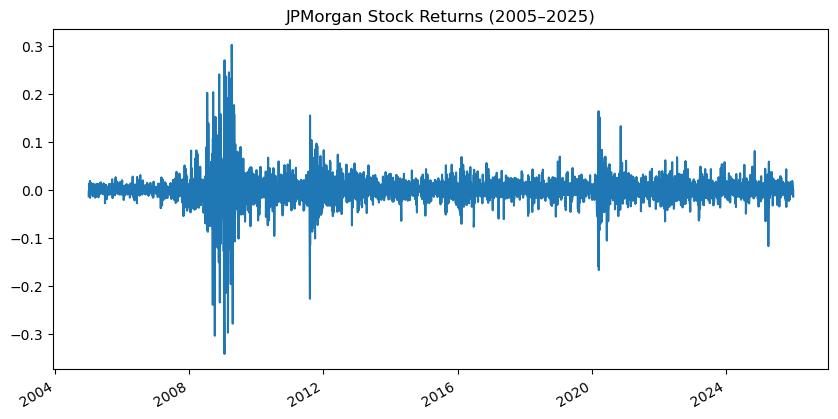

In [22]:
data["JPM"].plot(figsize=(10,5), title="JPMorgan Stock Returns (2005–2025)")
plt.show()



In [18]:
banks = ["JPM", "BAC", "WFC", "C", "GS", "MS"]

for bank in banks:
    
    Y = data[bank]
    X = data[["FedRateChange", "SP500_Return"]]
    X = sm.add_constant(X)
    
    model = sm.OLS(Y, X).fit()
    
    # Save results to text file
    filename = bank + "_regression_results.txt"
    
    with open(filename, "w") as f:
        f.write(model.summary().as_text())
        
    print(bank, "results saved.")


JPM results saved.
BAC results saved.
WFC results saved.
C results saved.
GS results saved.
MS results saved.


In [20]:
import os
print(os.getcwd())


/Users/nitish/anaconda_projects/64039456-52c6-4e45-be0b-fe71d4bf25ef


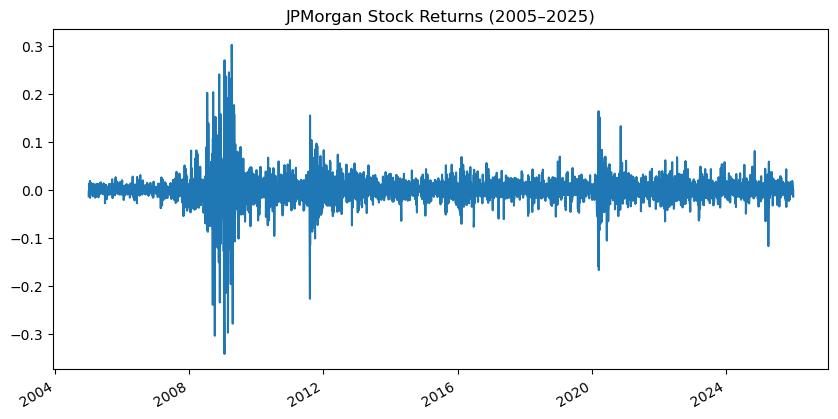

In [21]:
data["JPM"].plot(figsize=(10,5), title="JPMorgan Stock Returns (2005–2025)")
plt.show()


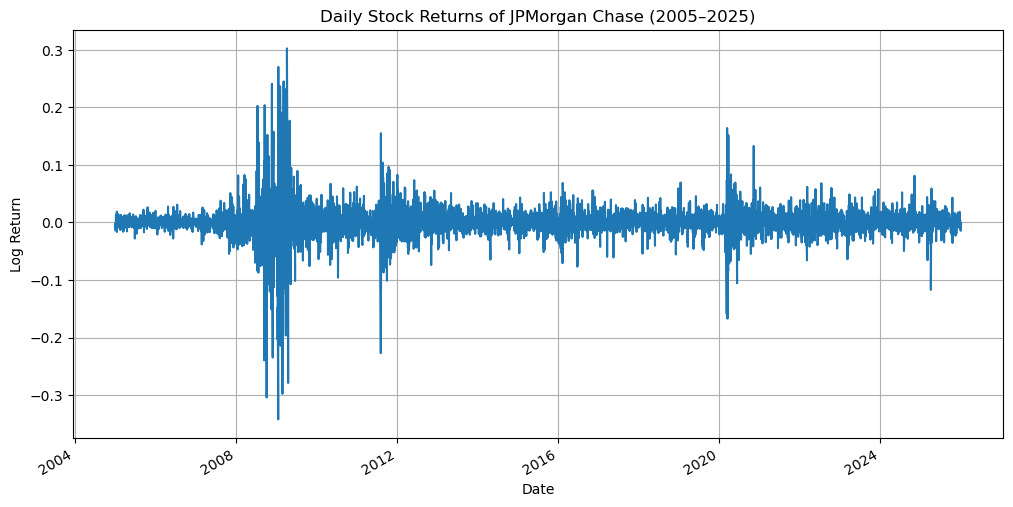

In [23]:
plt.figure(figsize=(12,6))

data["JPM"].plot()

plt.title("Daily Stock Returns of JPMorgan Chase (2005–2025)")
plt.xlabel("Date")
plt.ylabel("Log Return")

plt.grid(True)

plt.show()


In [24]:
fig.savefig("JPM_FedRate_graph.png", dpi=300, bbox_inches="tight")


NameError: name 'fig' is not defined

In [25]:
fig.savefig("JPM_FedRate_graph.png", dpi=300, bbox_inches="tight")


NameError: name 'fig' is not defined

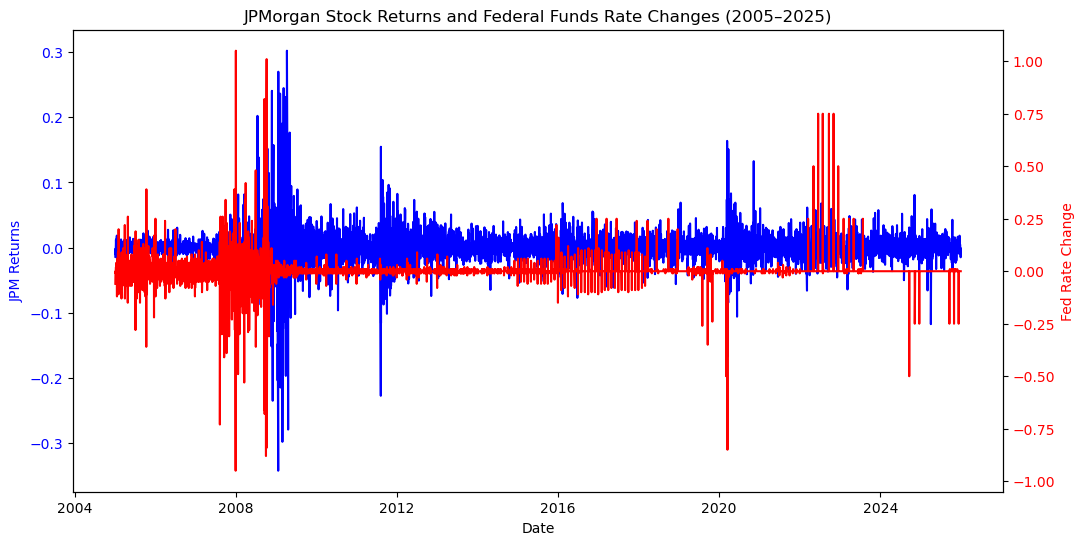

In [26]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot JPM returns
ax1.plot(data.index, data["JPM"], color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("JPM Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create second axis for Fed Rate Change
ax2 = ax1.twinx()
ax2.plot(data.index, data["FedRateChange"], color="red")
ax2.set_ylabel("Fed Rate Change", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title
plt.title("JPMorgan Stock Returns and Federal Funds Rate Changes (2005–2025)")

# Save the figure
fig.savefig("JPM_FedRate_graph.png", dpi=300, bbox_inches="tight")

# Show graph
plt.show()



/var/folders/cz/k2fjq_1d3ts5fvcgsvzh1mph0000gn/T/ipykernel_47220/2099499150.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


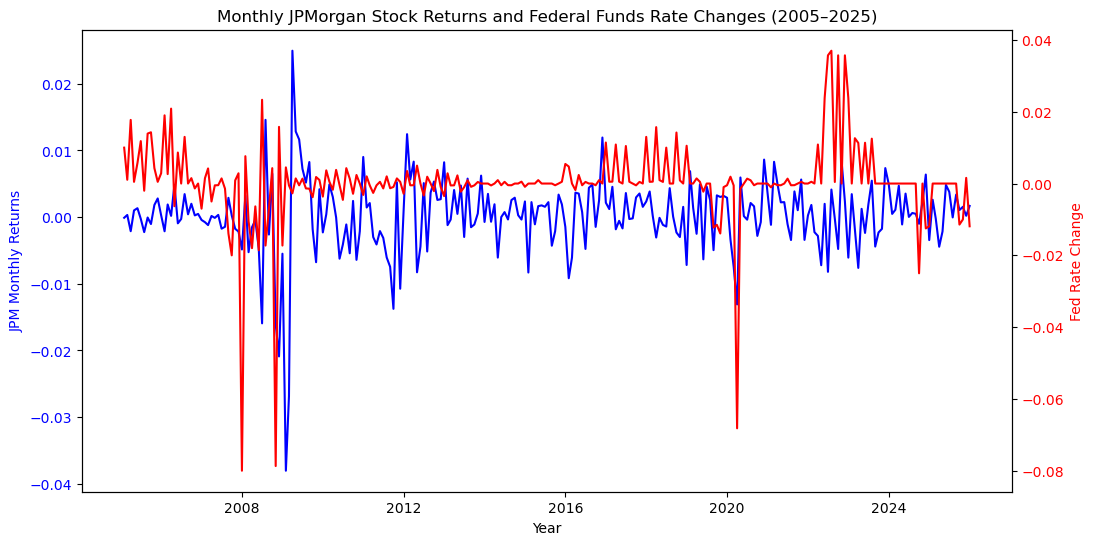

In [27]:
import matplotlib.pyplot as plt

# Convert daily data to monthly averages
monthly_data = data.resample('M').mean()

# Create figure
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot JPM monthly returns
ax1.plot(monthly_data.index, monthly_data["JPM"], color="blue", linewidth=1.5)
ax1.set_xlabel("Year")
ax1.set_ylabel("JPM Monthly Returns", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Plot Fed rate change on second axis
ax2 = ax1.twinx()
ax2.plot(monthly_data.index, monthly_data["FedRateChange"], color="red", linewidth=1.5)
ax2.set_ylabel("Fed Rate Change", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title
plt.title("Monthly JPMorgan Stock Returns and Federal Funds Rate Changes (2005–2025)")

# Save graph
fig.savefig("JPM_FedRate_monthly.png", dpi=300, bbox_inches="tight")

# Show graph
plt.show()


In [28]:
plt.savefig("JPM_FedRate_monthly.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

In [29]:
import os
print(os.getcwd())


/Users/nitish/anaconda_projects/64039456-52c6-4e45-be0b-fe71d4bf25ef


In [30]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     MS   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     2314.
Date:                Tue, 17 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:23:05   Log-Likelihood:                 13689.
No. Observations:                5281   AIC:                        -2.737e+04
Df Residuals:                    5278   BIC:                        -2.735e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.000     -0.561